## What are CNNs?

A CNN, also known as a ConvNet, is one of the most widely used deep
learning algorithms for computer vision tasks.

CNNs
consists of the following three important layers:
- The convolutional layer
- The pooling layer
- The fully connected layer

## Architecture of CNNs

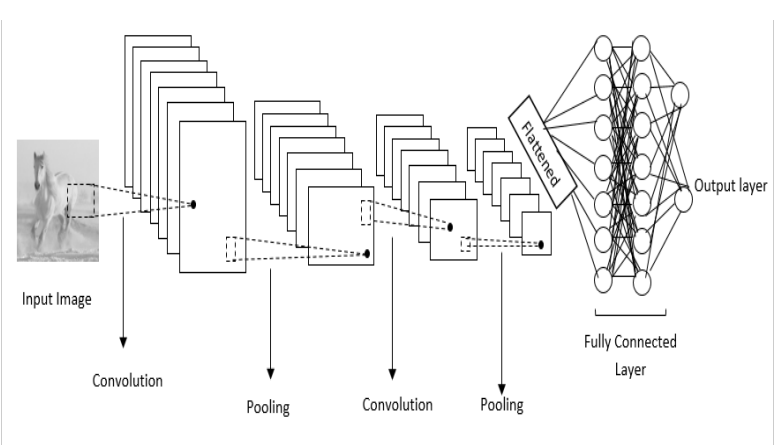

## The Math Behind CNNs

Forward Propogation

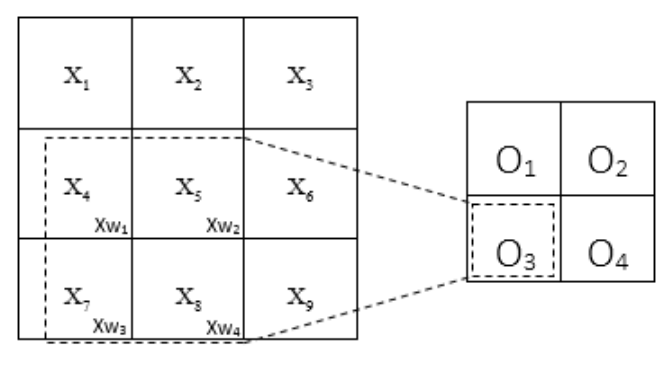

Thus, all the values in the output matrix (feature map) are computed as
follows:
$$o_1 = x_1 w_1 + x_2 w_2 + x_4w_3 + x_5 w_4$$
$$o_1 = x_1 w_1 + x_2 w_2 + x_4w_3 + x_5 w_4$$
$$o_1 = x_1 w_1 + x_2 w_2 + x_4w_3 + x_5 w_4$$
$$o_1 = x_1 w_1 + x_2 w_2 + x_4w_3 + x_5 w_4$$

In a simpe equation,  Let's say
we have an input image, $X$, with a width of $W$ and a height of $H$, and the filter
of size $P$ x $Q$, then the convolution operation can be represented as follows:
$$ o_{ij} = \sum_{m=0}^{p-1} \sum_{n=0}^{q-1}{W_{m,n}. X_{i+m, j+n}} $$


Once the convolution operation is performed, we feed the result, $o_{ij}$, to a
feedforward network, $\hat{y}$, and predict the output, $\hat{y}_t$:
$$ \hat{y}_i = f(o_{ij})$$

Backward Propagation

Once we have predicted the output, we compute the loss, $L$. We use the mean
squared error as the loss function, that is, the mean of the squared difference
between the actual output, $y_t$, and the predicted output, $\hat{y}_t$, which is given as
follows:
$$ L = \frac{1}{2} \sum_{i}{({y}_i - \hat{y}_i)^2} $$

##Implementing a CNN in TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
import tensorflow_datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = tensorflow_datasets.load('mnist')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.S88GH0_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.S88GH0_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

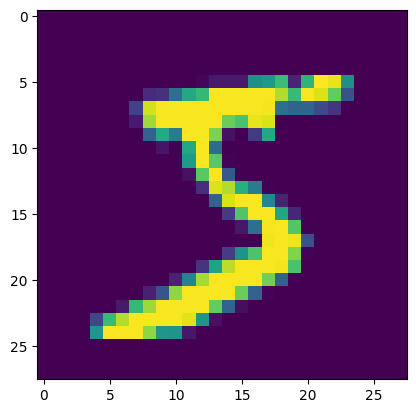

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [8]:
with tf.device('/CPU:0'):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size= 3, activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, kernel_initializer=tf.keras.initializers.HeNormal, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])


    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )

    # model.summary()

    model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9238 - loss: 0.2581
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9845 - loss: 0.0493
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9909 - loss: 0.0284
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9947 - loss: 0.0164
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9962 - loss: 0.0111
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9967 - loss: 0.0093
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9983 - loss: 0.0054
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9981 - loss: 0.0053
Epoch 9/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9987 - loss: 0.0046
Epoch 10/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9989 - loss: 0.0030


In [10]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9287 - loss: 0.2479


[0.2120826691389084, 0.9405999779701233]

##CNN Architectures

###LeNet architecture

The LeNet architecture is one of the classic architectures of a CNN. As shown
in the following diagram, the architecture is very simple, and it consists of
only seven layers. Out of these seven layers, there are three convolutional
layers, two pooling layers, one fully connected layer, and one output layer. It
uses a 5 x 5 convolution with a stride of 1, and uses average pooling. What is
5 x 5 convolution? It implies we are performing a convolution operation with
a 5 x 5 filter.

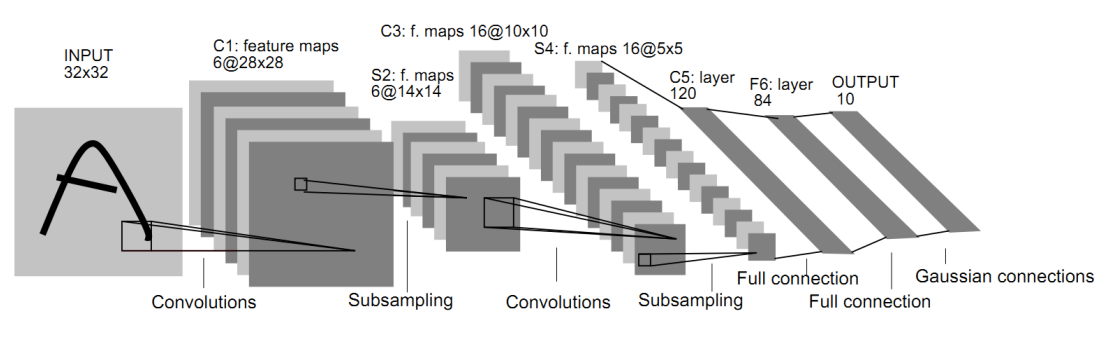

###AlexNet

AlexNet was designed by pioneering scientists, including Alex Krizhevsky,
Geoffrey Hinton, and Ilya Sutskever. It consists of five convolutional layers
and three fully connected layers, as shown in the following diagram. It uses
the ReLU activation function instead of the tanh function, and ReLU is applied
after every layer. It uses dropout to handle overfitting, and dropout is
performed before the first and second fully connected layers. It uses data
augmentation techniques, such as image translation, and is trained using batch
stochastic gradient descent on two GTX 580 GPUs for 5 to 6 days:



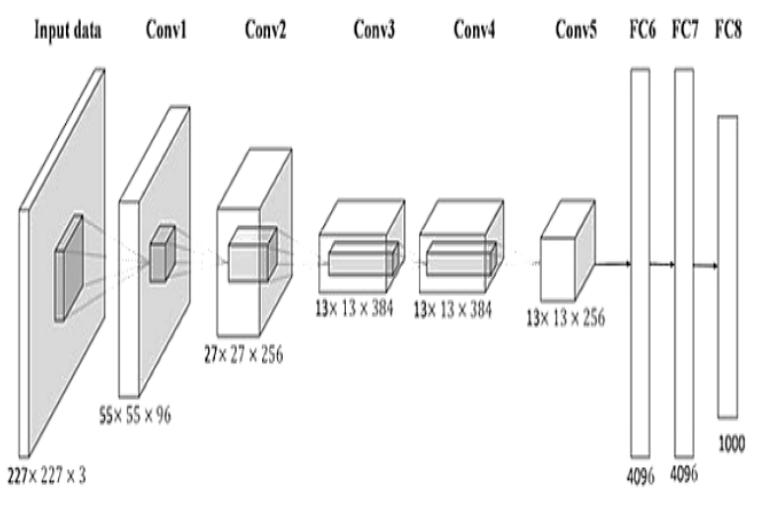

###VGGNet architecture

VGGNet is one of the most popularly used CNN architectures. It was invented
by the Visual Geometry Group (VGG) at the University of Oxford. It started
to get very popular when it became the first runner-up of ILSVRC 2014.
It is basically a deep convolutional network and is widely used for objectdetection tasks. The weights and structure of the network are made available
to the public by the Oxford team, so we can use these weights directly to carry
out several computer vision tasks. It is also widely used as a good baseline
feature extractor for images.
The architecture of the VGG network is very simple. It consists of
convolutional layers followed by a pooling layer. It uses 3 x 3 convolution
and 2 x 2 pooling throughout the network. It is referred to as VGG-n, where n
corresponds to a number of layers, excluding the pooling and softmax layer.
The following figure shows the architecture of the VGG-16 network:


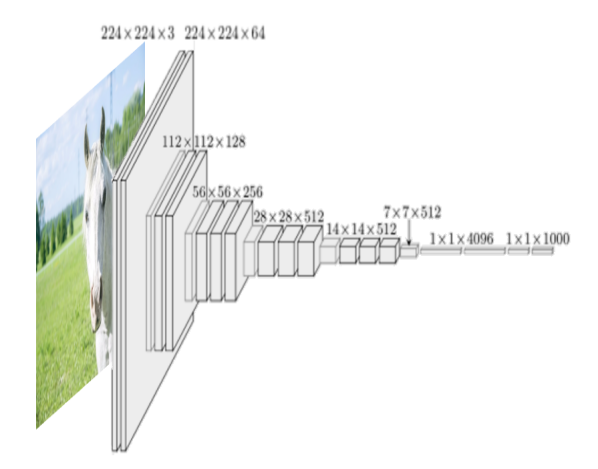

###GoogleNet

GoogleNet, also known as inception net, was the winner of ILSVRC 2014.
It consists of various versions, and each version is an improved version of
the previous one. We will explore each version one by one.
